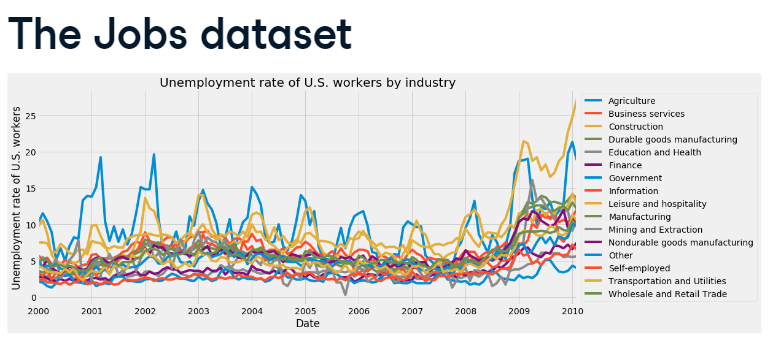

122개 시점, 16개 산업에 대한 시계열 -> 10년간 한달에 한 번.

In [1]:
# 퀴즈 1-1

# Read in jobs file
jobs = pd.read_csv(url_jobs)

# Print first five lines of your DataFrame
print(jobs.head(5))

# Check the type of each column in your DataFrame
print(jobs.dtypes)

# Convert datestamp column to a datetime object
jobs['datestamp'] = pd.to_datetime(jobs['datestamp'])

# Set the datestamp columns as the index of your DataFrame
jobs = jobs.set_index('datestamp')

# Check the number of missing values in each column
print(jobs.isnull().sum())

NameError: name 'pd' is not defined

# Output

        datestamp  Agriculture  Business services  Construction  Durable goods manufacturing  ...  Nondurable goods manufacturing  Other  Self-employed  Transportation and Utilities  \
    0  2000-01-01         10.3                5.7           9.7                          3.2  ...                             4.4    4.9            2.3                           4.3   
    1  2000-02-01         11.5                5.2          10.6                          2.9  ...                             4.2    4.1            2.5                           4.0   
    2  2000-03-01         10.4                5.4           8.7                          2.8  ...                             5.1    4.3            2.0                           3.5   
    3  2000-04-01          8.9                4.5           5.8                          3.4  ...                             4.0    4.2            2.0                           3.4   
    4  2000-05-01          5.1                4.7           5.0                          3.4  ...                             3.6    4.5            1.9                           3.4   
    
       Wholesale and Retail Trade  
    0                         5.0  
    1                         5.2  
    2                         5.1  
    3                         4.1  
    4                         4.3  
    
    [5 rows x 17 columns]
    datestamp                          object
    Agriculture                       float64
    Business services                 float64
    Construction                      float64
    Durable goods manufacturing       float64
    Education and Health              float64
    Finance                           float64
    Government                        float64
    Information                       float64
    Leisure and hospitality           float64
    Manufacturing                     float64
    Mining and Extraction             float64
    Nondurable goods manufacturing    float64
    Other                             float64
    Self-employed                     float64
    Transportation and Utilities      float64
    Wholesale and Retail Trade        float64
    dtype: object
    Agriculture                       0
    Business services                 0
    Construction                      0
    Durable goods manufacturing       0
    Education and Health              0
    Finance                           0
    Government                        0
    Information                       0
    Leisure and hospitality           0
    Manufacturing                     0
    Mining and Extraction             0
    Nondurable goods manufacturing    0
    Other                             0
    Self-employed                     0
    Transportation and Utilities      0
    Wholesale and Retail Trade        0
    dtype: int64

In [ ]:
# 퀴즈 1-2

# Generate a boxplot
jobs.boxplot(fontsize=6, vert=False)
plt.show()

# Generate numerical summaries
print(jobs.describe())

# Print the name of the time series with the highest mean
print('Agriculture')

# Print the name of the time series with the highest variability
print('Construction') 
# 가장 시각적으로 변동성이 큰 construction과 agriculture에 대해 describe 값 : agri -> std 3.962   cons-> 4.588

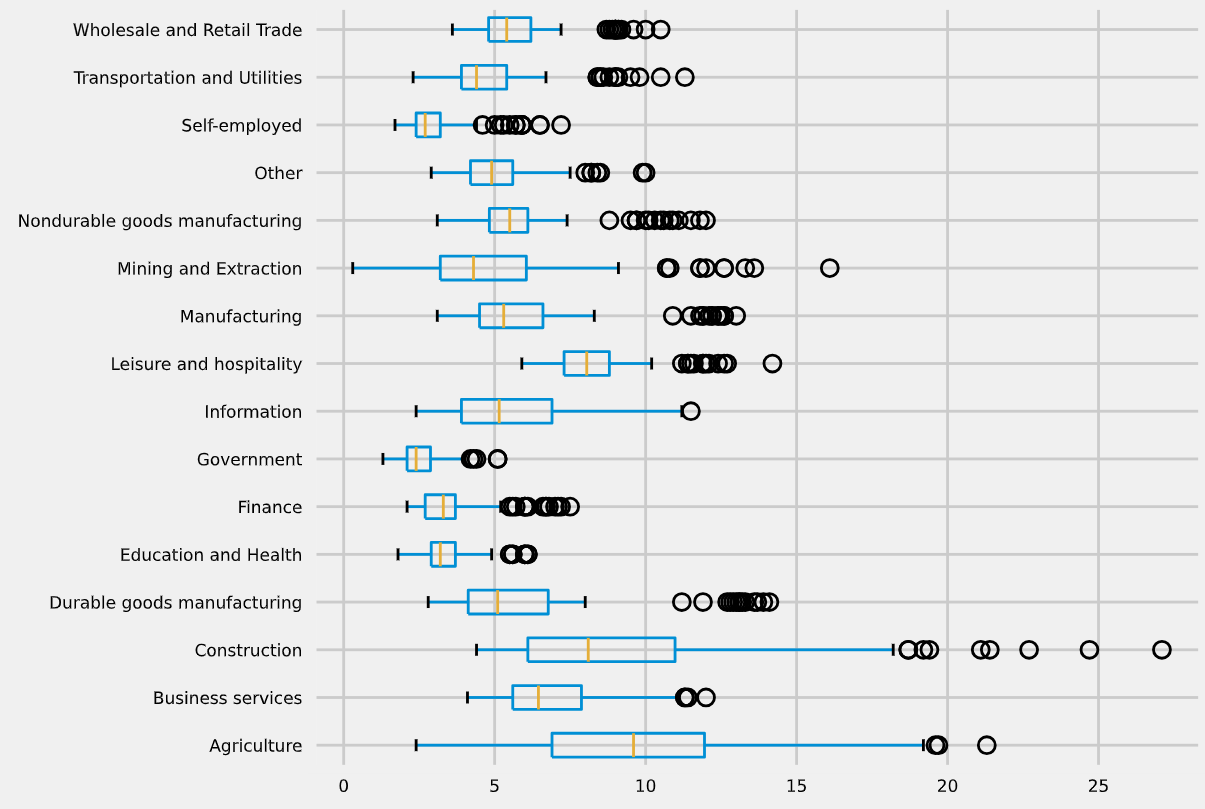

In [2]:
# 퀴즈 2-1

# A subset of the jobs DataFrame
jobs_subset = jobs[['Finance', 'Information', 'Manufacturing', 'Construction']]

# Print the first 5 rows of jobs_subset
print(jobs_subset.head())

# Create a facetted graph with 2 rows and 2 columns
ax = jobs_subset.plot(subplots=True,
                      layout=(2,2),
                      sharex=False,
                      sharey=False,
                      linewidth=0.7,
                      fontsize=3,
                      legend=False)

plt.show()

NameError: name 'jobs' is not defined

In [3]:
# 퀴즈 2-2

# A subset of the jobs DataFrame
jobs_subset = jobs[['Finance', 'Information', 'Manufacturing', 'Construction']]

# Print the first 5 rows of jobs_subset
print(jobs_subset.head())

# Create a facetted graph with 2 rows and 2 columns
ax = jobs_subset.plot(subplots=True,
                      layout=(2,2),
                      sharex=False,
                      sharey=False,
                      linewidth=0.7,
                      fontsize=3,
                      legend=False)
ax[0, 0].set_title("Finance")
ax[0, 1].set_title("Information")
ax[1, 0].set_title("Manufacturing")
ax[1, 1].set_title("Construction")

plt.show()

NameError: name 'jobs' is not defined

2-2 plot
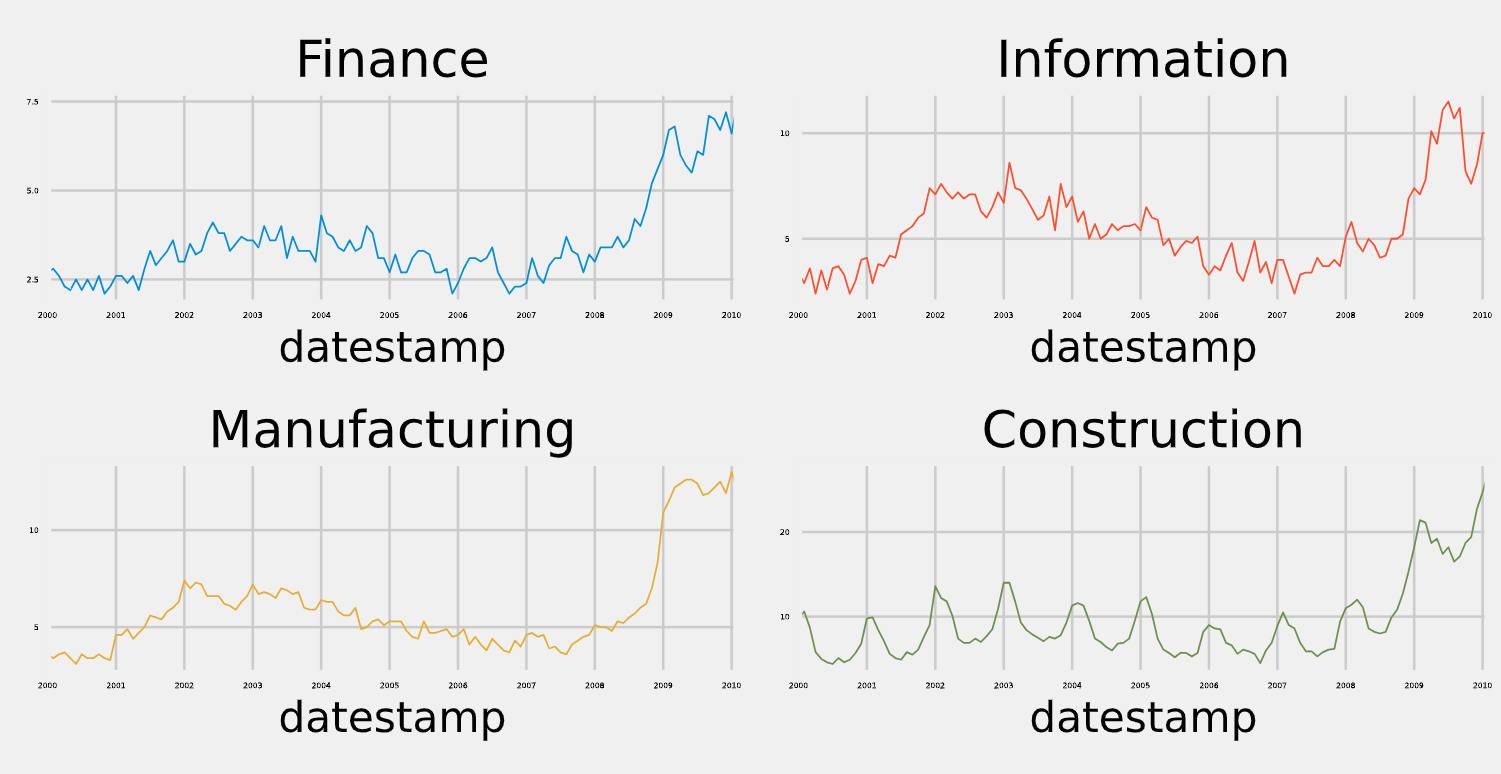

In [4]:
# 퀴즈 2-3

# Plot all time series in the jobs DataFrame
ax = jobs.plot(colormap='Spectral', fontsize=6, linewidth=0.8)

# Set labels and legend
ax.set_xlabel('Date', fontsize=10)
ax.set_ylabel('Unemployment Rate', fontsize=10)
ax.set_title('Unemployment rate of U.S. workers by industry', fontsize=10)
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# Annotate your plots with vertical lines
ax.axvline('2001-07-01', color='blue', linestyle='--', linewidth=0.8)
ax.axvline('2008-09-01', color='blue', linestyle='--', linewidth=0.8)

# Show plot
plt.show()

NameError: name 'jobs' is not defined

2-3 퀴즈
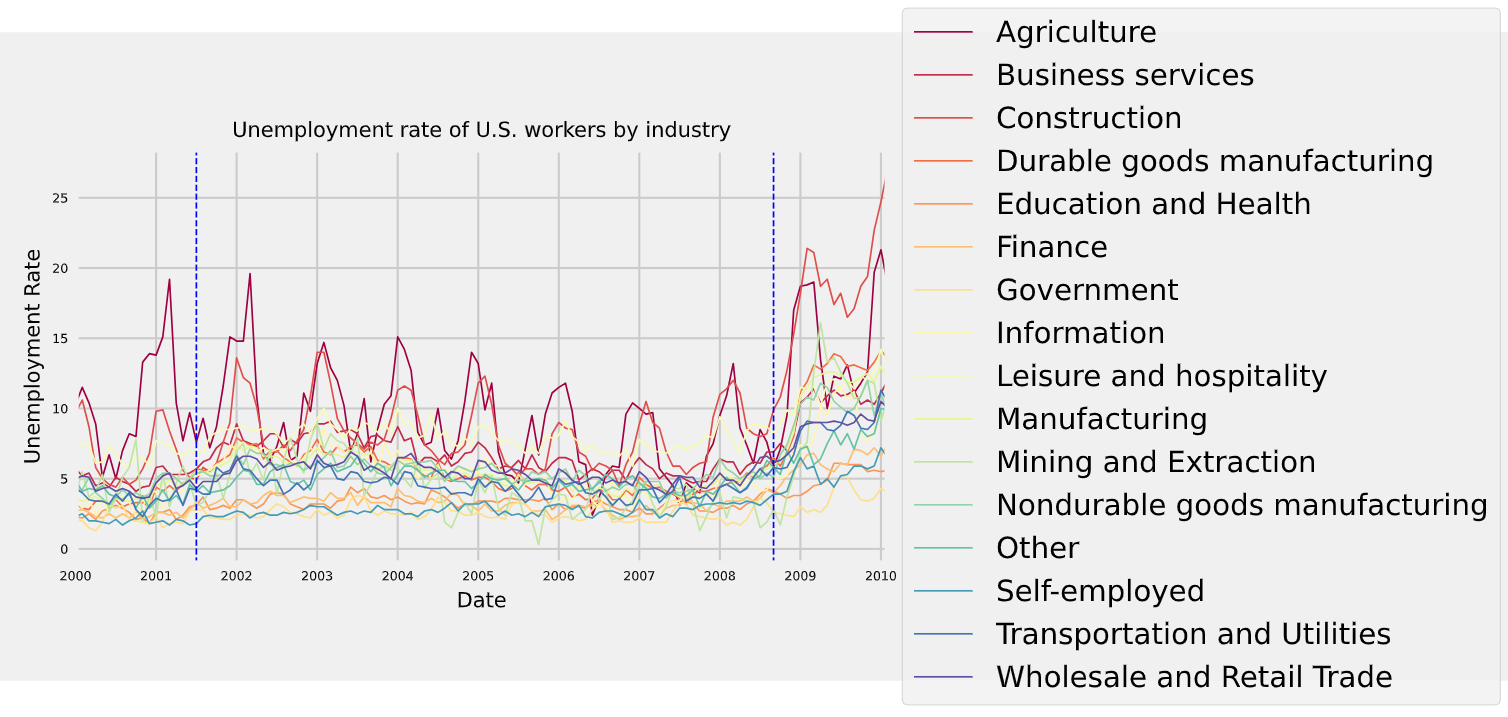

In [5]:
# 퀴즈 2-4

# Extract of the year in each date indices of the jobs DataFrame
index_year = jobs.index.year

# Compute the mean unemployment rate for each year
jobs_by_year = jobs.groupby(index_year).mean()

# Plot the mean unemployment rate for each year
ax = jobs_by_year.plot(fontsize=6, linewidth=1)

# Set axis labels and legend
ax.set_xlabel('Year', fontsize=10)
ax.set_ylabel('Mean unemployment rate', fontsize=10)
ax.legend(bbox_to_anchor=(0.1, 0.5), fontsize=10)
plt.show()

NameError: name 'jobs' is not defined

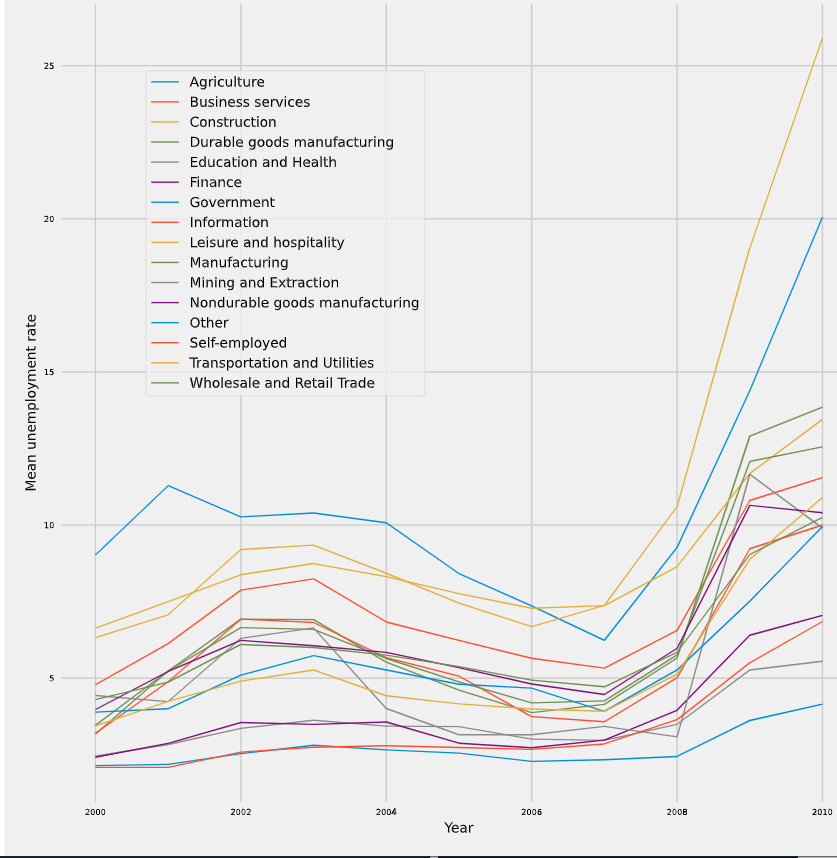

# Dictionaries

* 파이썬 딕셔너리 데이터 구조를 활용.
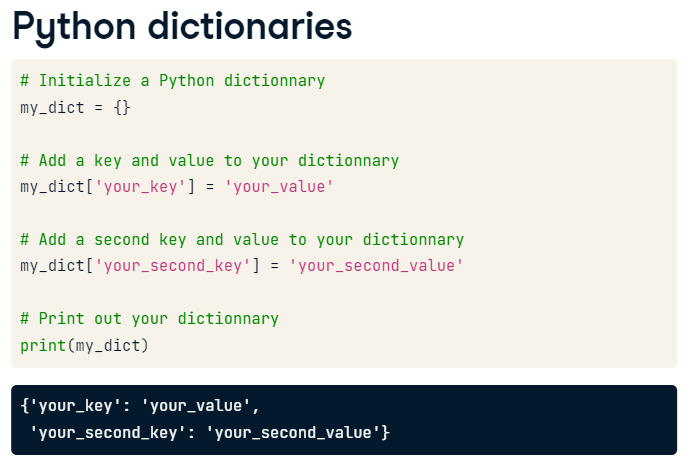
key - value 이 구조를 활ㅇ요해서 시계열 분해의 결과 저장 가능.

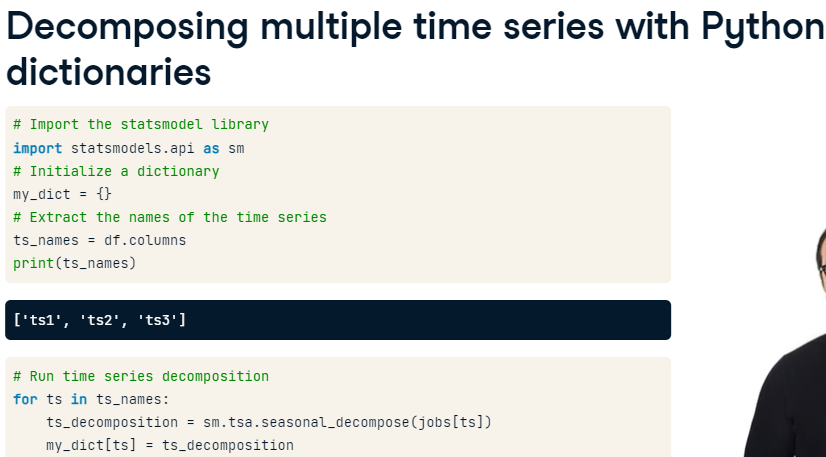
mydict 딕셔너리 만들고 여기에 데이터프레임의 컬럼을 넣고 이 컬럼마다 for문을 활용해서 decomposition을 진행.

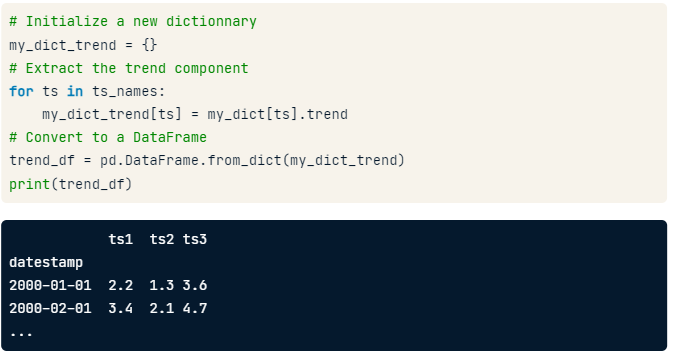
트렌드 추세를 추출.
pandas의 from_dict 를 활용해서 딕셔너리 데이터를 trend_df라는 데이터프레임에 자동변환하는데 사용.
 

In [6]:
#퀴즈 3-1

# Initialize dictionary
jobs_decomp = {}

# Get the names of each time series in the DataFrame
jobs_names = jobs.columns

# Run time series decomposition on each time series of the DataFrame
for ts in jobs_names:
    ts_decomposition = sm.tsa.seasonal_decompose(jobs[ts])
    jobs_decomp[ts] = ts_decomposition

NameError: name 'jobs' is not defined

In [ ]:
# 퀴즈 3-2

# Extract the seasonal values for the decomposition of each time series
for ts in jobs_names:
    jobs_seasonal[ts] = jobs_decomp[ts].seasonal
    
# Create a DataFrame from the jobs_seasonal dictionary
seasonality_df = pd.DataFrame.from_dict(jobs_seasonal)

# Remove the label for the index
seasonality_df.index.name = None

# Create a faceted plot of the seasonality_df DataFrame
seasonality_df.plot(subplots=True,
                   layout=(4, 4),
                   sharey=False,
                   fontsize=2,
                   linewidth=0.3,
                   legend=False)

# Show plot
plt.show()

3-2

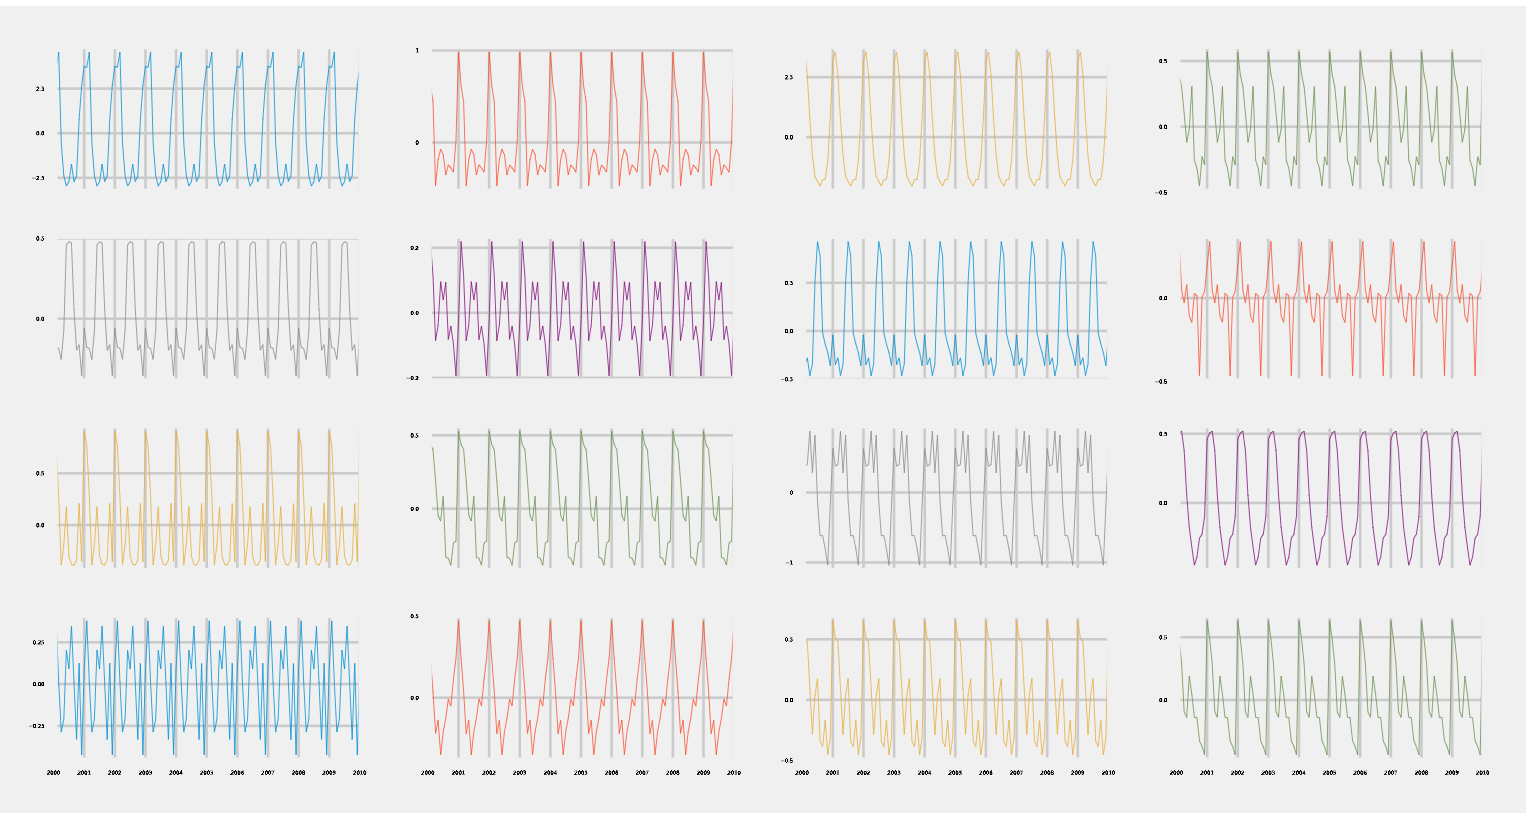

# Correlations between time series

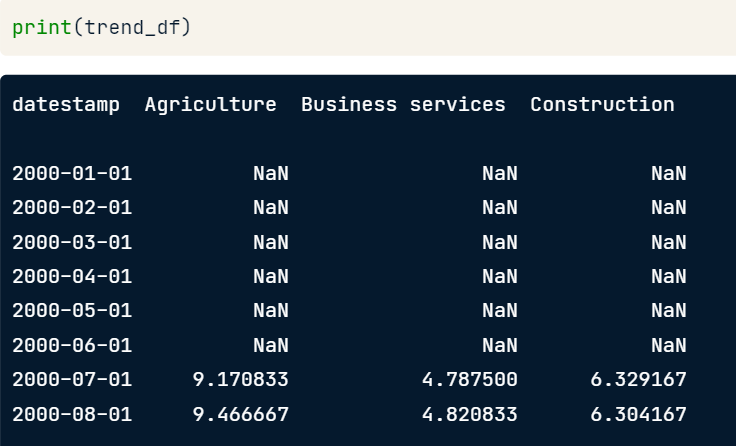
trend_Df를 안에 컬럼 간 상관 관계를 계산하고 이때 스피어맨 방법을 활용해서 클러스터맵을 그림. 
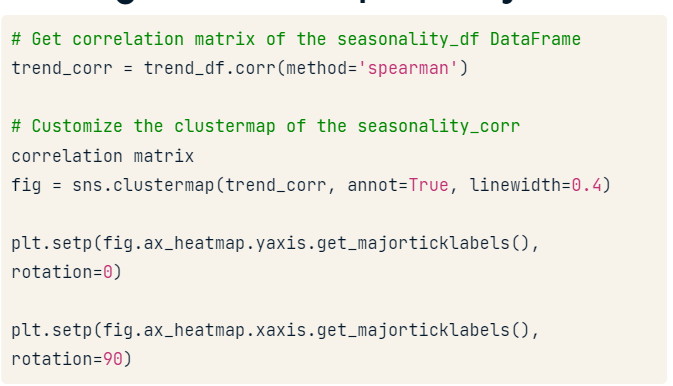
y축 레이블은 0도 회전각도,x축 레이블은 90도 회전.
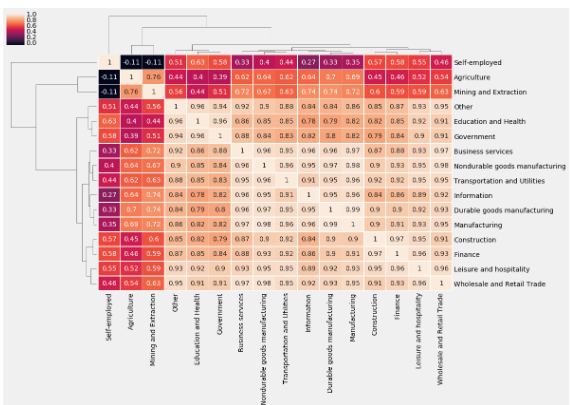

In [7]:
# 퀴즈 4-1

# Get correlation matrix of the seasonality_df DataFrame
seasonality_corr = seasonality_df.corr(method = 'spearman')

# Customize the clustermap of the seasonality_corr correlation matrix
fig = sns.clustermap(seasonality_corr, annot=True, annot_kws={"size": 4}, linewidths=.4, figsize=(15, 10))
plt.setp(fig.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.setp(fig.ax_heatmap.xaxis.get_majorticklabels(), rotation=90)
plt.show()

# Print the correlation between the seasonalities of the Government and Education & Health industries
print(0.89)

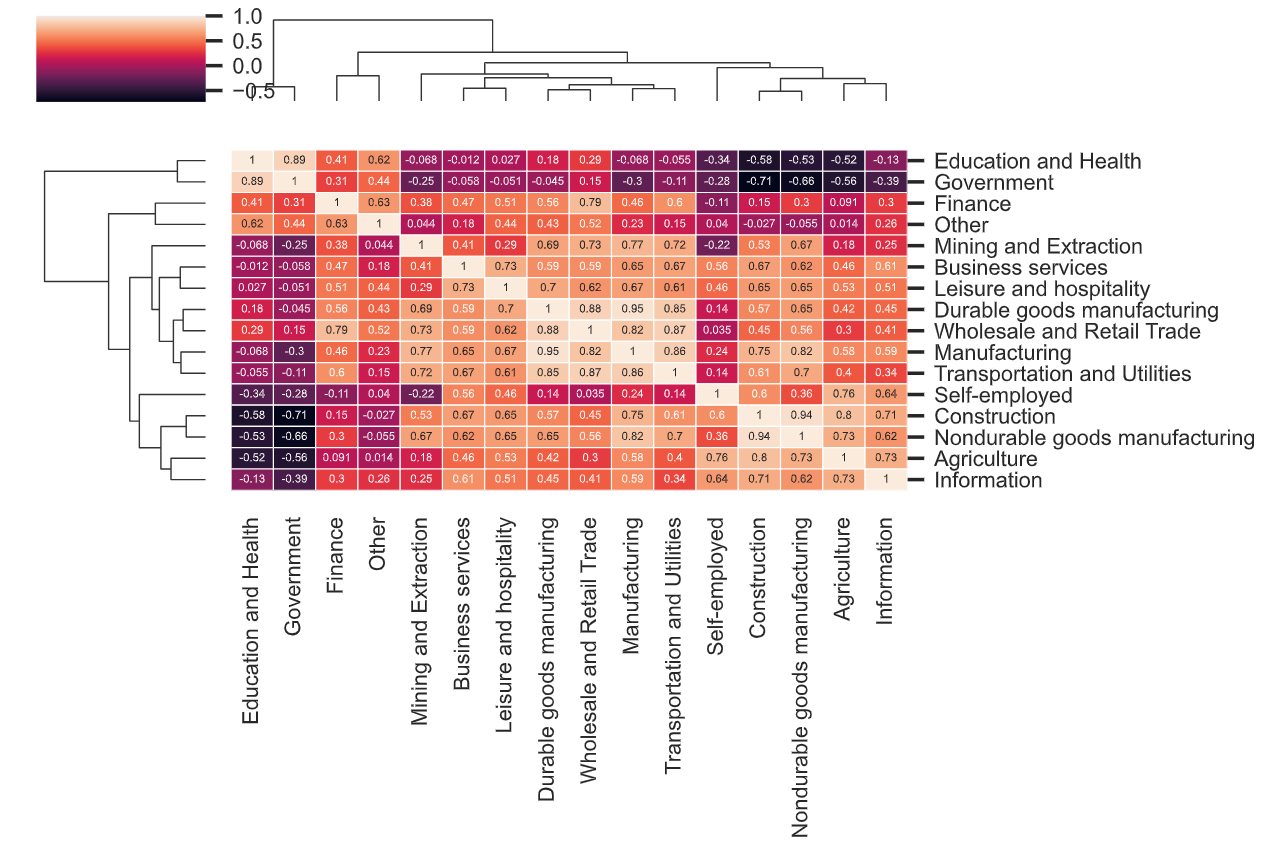

퀴즈 4-2

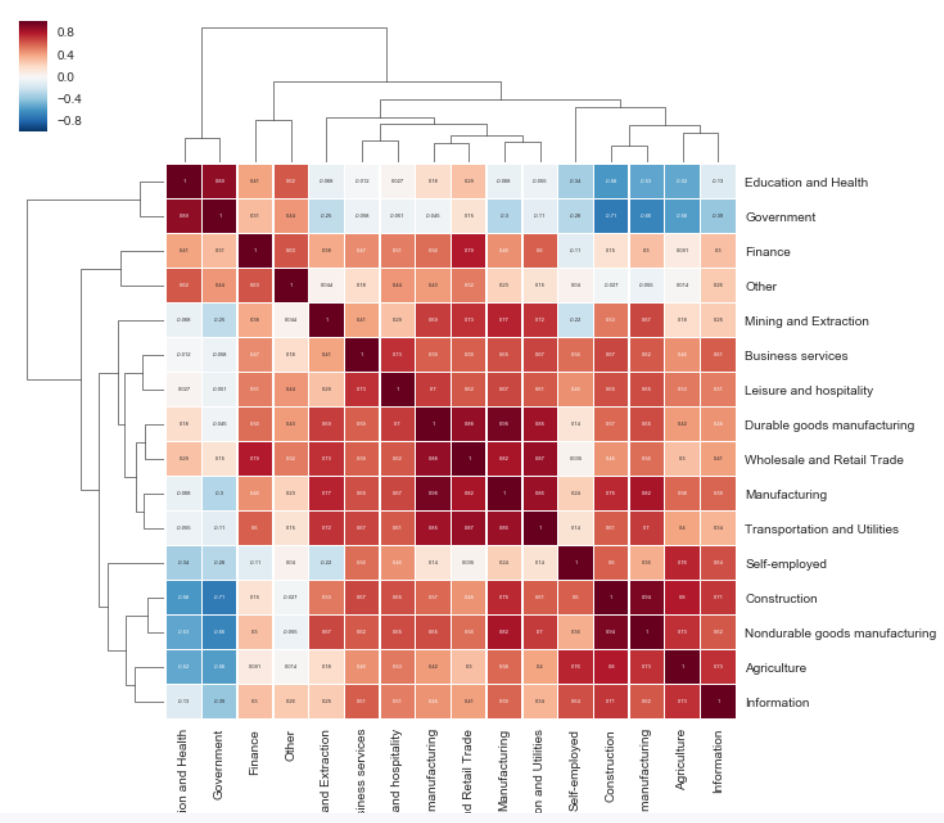

Q.selfemployed와 가장 큰 상관성? A. Agriculture